In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("설문조사결과.csv", encoding='utf-8-sig')

In [3]:
# 전체 응답자
len(data)

118

In [4]:
col_lst=list(data.columns)
col_relst=list(range(len(col_lst)))

In [5]:
i=0
for col in col_lst:
    data.rename(columns={col:str(col_relst[i])}, inplace=True)
    i+=1

In [6]:
# 2020,2021년 입학, covid-19경험 있지만 속하지 않은 사람, 그 외 시각화로 보여주기
corona=data[data['3']>=2020].reset_index(drop=True)
corona=corona[corona['4']=='예'].reset_index(drop=True)
corona2=data[data['3']<2020].reset_index(drop=True)
da_corona=corona2[corona2['4']=='예'].reset_index(drop=True)
not_corona=data[data['4']=='아니오'].reset_index(drop=True)

In [7]:
# (부모님거주 제외) 자취 Case로 뽑아내보기
corona=corona[corona['2']!='부모님과 함께 거주'].reset_index(drop=True)
da_corona=da_corona[da_corona['2']!='부모님과 함께 거주'].reset_index(drop=True)
not_corona=not_corona[not_corona['2']!='부모님과 함께 거주'].reset_index(drop=True)

In [8]:
# 2020,2021년 입학 참여 인원
len(corona)

15

In [9]:
# covid-19경험 있지만 2020,2021년 속하지 않은 참여 인원
len(da_corona)

25

In [10]:
#  그 외
len(not_corona)

10

## 종합 설문지 그래프 
1.    2020,2021년 입학, covid-19경험 있지만 속하지 않은 사람 두개 중 시각화로 보여주기

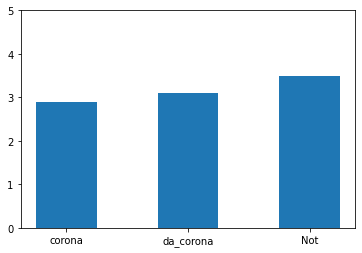

In [11]:
# 첫 문항 평균 만족도 (그외는 작년에 비해 현재 생활 만족도)
lst={'corona':np.round(corona['5'].mean(),1) , 'da_corona':np.round(da_corona['5'].mean(),1), 
    'Not':np.round(not_corona['43'].mean(),1)}
x=lst.keys()
y=lst.values()
plt.bar(x, y, width=0.5)
plt.yticks(list(range(6)))
plt.show()

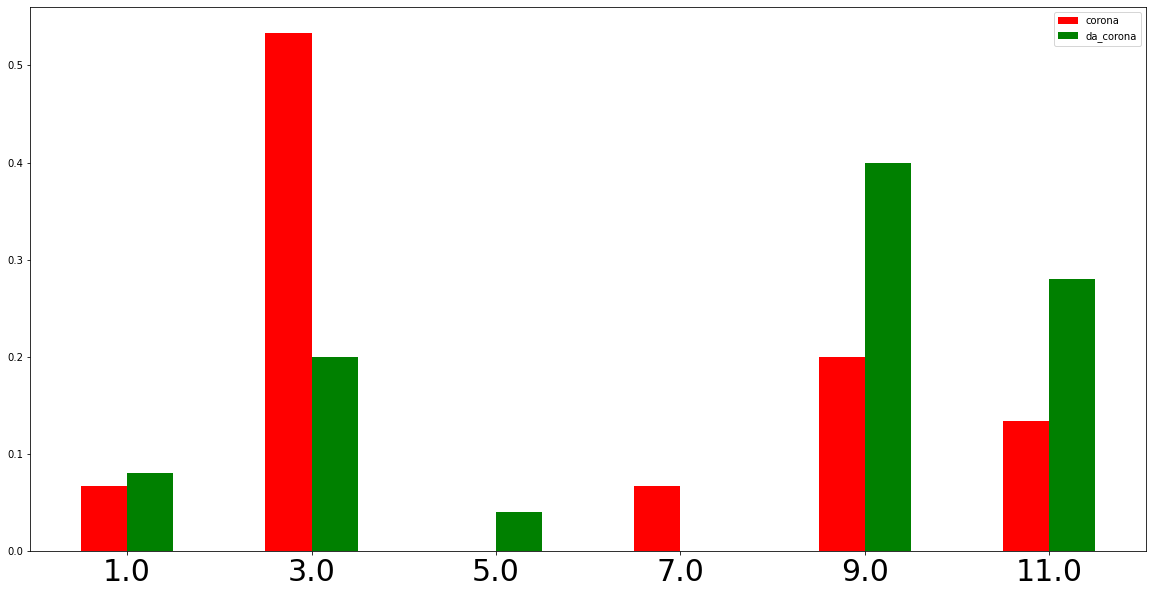

In [12]:
# 만족도를 평가하실 때 가장 먼저 떠올랐던 것은 무엇인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
name=list(set(list(da_corona['6'].value_counts().keys())+(list(corona['6'].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona['6'].value_counts(),da_corona['6'].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [13]:
dic          ## check

{'여가 활동 (여행, 스포츠)': 1.0,
 '대인 관계 (사적모임 포함)': 3.0,
 '수업의 질': 5.0,
 '아르바이트': 7.0,
 '자기개발 (학점, 스케쥴 관리, 취업 준비, 자격증, 스터디)': 9.0,
 '대내외 활동 (학회, 동아리, 공모전)': 11.0}

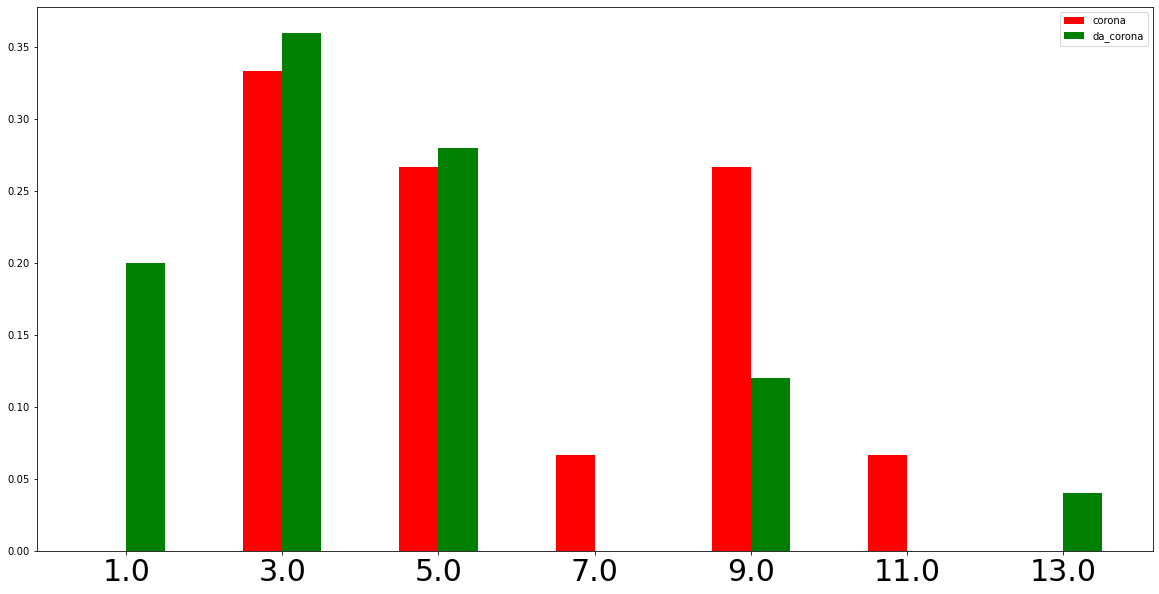

In [14]:
# Covid-19시기 대학생활에 불만족스러운 점이 있었다면, 이유는 무엇인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='7'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [15]:
dic          ## check

{'혼자하는 공부': 1.0,
 '새로운 사람과 만날일이 없음': 3.0,
 '집밖에 나갈 일이 없음': 5.0,
 '친한 사람들과 모임이 없음': 7.0,
 '똑같은 일상 반복': 9.0,
 '마지막 사항 제외하고 모두': 11.0,
 '인강이 얼마나 위대한지 몸소 실감하는 5티어급 화질과 강의 질': 13.0}

In [16]:
### 코 그룹과 둘 그룹의 1, 7, 11 번의 만족도 비교
co_sat=list(corona[corona['7']=='집밖에 나갈 일이 없음']['5'].values)+list(corona[corona['7']=='새로운 사람과 만날일이 없음']['5'].values)+list(corona[corona['7']=='똑같은 일상 반복']['5'].values)
daco_sat=list(da_corona[da_corona['7']=='집밖에 나갈 일이 없음']['5'].values)+list(da_corona[da_corona['7']=='새로운 사람과 만날일이 없음']['5'].values)+list(da_corona[da_corona['7']=='똑같은 일상 반복']['5'].values)
print("코 그룹: ",np.mean(co_sat))
print("둘 그룹: ",np.mean(daco_sat))

코 그룹:  2.923076923076923
둘 그룹:  2.9473684210526314


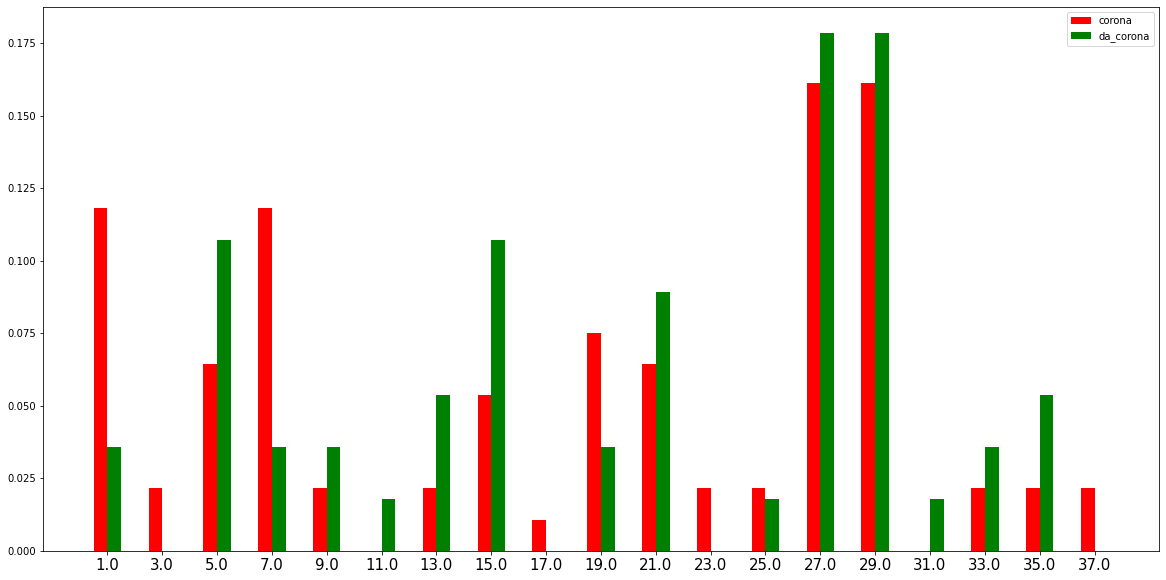

In [17]:
# 비대면 중간고사가 끝났습니다. 이제 한숨 놀고 싶어요! 이후 어떤 방법을 주로 행동했나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='8'

temp=[]
for value in da_corona[num].values:
    temp2=list(value.split(','))
    temp.extend(temp2)
lst=[Counter(temp)]
lst[0][' SNS ']=lst[0]['SNS ']+lst[0][' SNS ']
del lst[0]['SNS ']

temp=[]
for value in corona[num].values:
    temp2=list(value.split(','))
    temp.extend(temp2)

lst.append(Counter(temp))
lst[1][' SNS ']=lst[1]['SNS ']+lst[1][' SNS ']
del lst[1]['SNS ']

name_num=[sum(lst[0].values()),sum(lst[1].values())] # 체크한 사람 전체 개수
name=list(set(list(lst[0].keys())+(list(lst[1].keys()))))
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=15,rotation=0)
plt.show()

In [18]:
dic

{' SNS ': 1.0,
 ' 행동이 잘 기억이 나지 않음': 3.0,
 ' 사람들과 오프라인 약속을 잡음': 5.0,
 ' 온라인 커뮤니티 활동': 7.0,
 ' 독서 및 개인 정비': 9.0,
 ' 악기 연습': 11.0,
 ' 쇼핑(온라인/오프라인)': 13.0,
 ' 맛있는 음식 먹기': 15.0,
 ' 밀린 수업과 과제로 놀 수 없다': 17.0,
 ' 온라인 게임(콘솔게임 포함)': 19.0,
 ' 쿨쿨 잠!': 21.0,
 '운동 및 건강관리': 23.0,
 '쇼핑(온라인/오프라인)': 25.0,
 '넷플': 27.0,
 ' 유튜브 등 영상 시청': 29.0,
 ' 연인과  코로나 단계 낮은곳으로 멀리 여행가기': 31.0,
 ' 운동 및 건강관리': 33.0,
 '쿨쿨 잠!': 35.0,
 ' 주식 등 투자활동': 37.0}

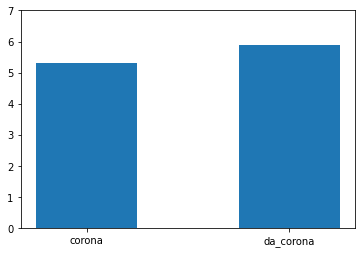

In [19]:
# 행동하면서 그 순간 만큼은 즐겁거나 집중할 수 있었나요?
num='9'
lst={'corona':np.round(corona[num].mean(),1) , 'da_corona':np.round(da_corona[num].mean(),1)}
x=lst.keys()
y=lst.values()
plt.bar(x, y, width=0.5)
plt.yticks(list(range(8)))
plt.show()

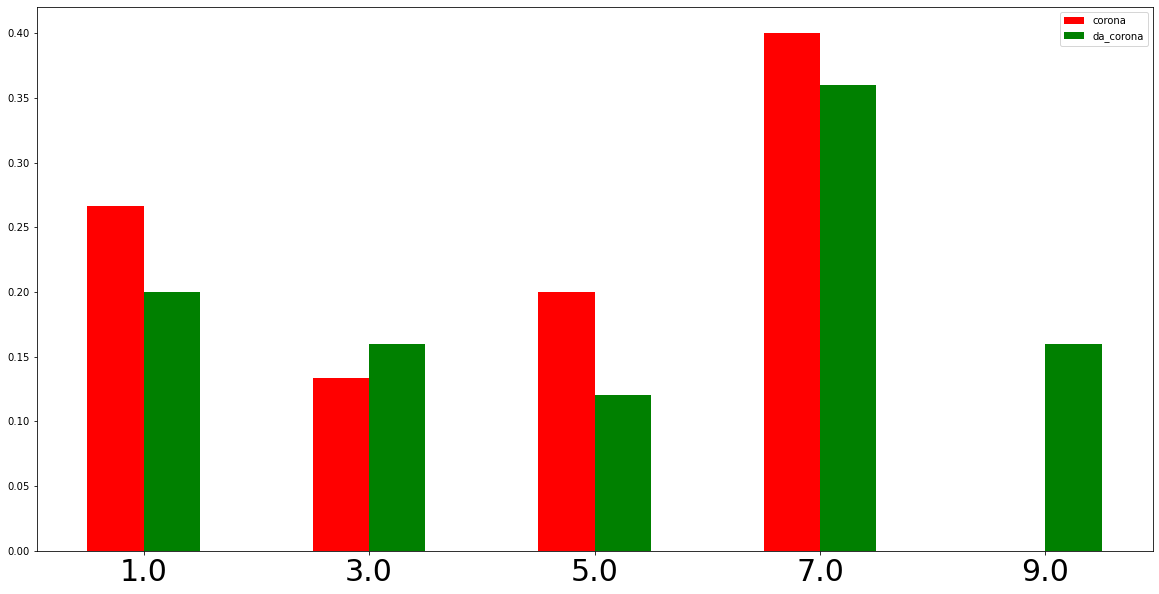

In [20]:
# 즐겁거나 집중할 수 없었다면 이유가 무엇이었나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='10'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [22]:
dic

{'사람들과 같이 할 수 없음': 1.0,
 '아무생각 없이 한 것이라서': 3.0,
 '즐겁거나 집중할 수 있었음': 5.0,
 '충분한 시간이 부족함': 7.0,
 '충분한 장소가 마련되지 않음': 9.0}

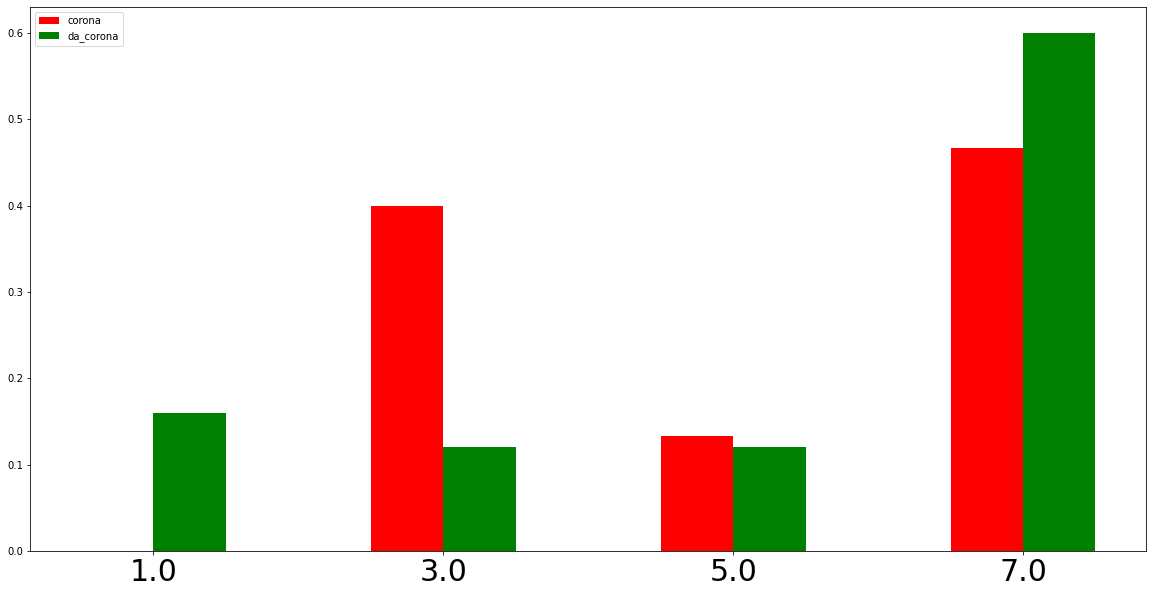

In [21]:
# 행동을 하고 난 후에는 어떤 감정이 들었나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='11'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [22]:
dic          ## check

{'다시 돌아간다면,  하지 않을 것이다.': 1.0,
 '어쩔수 없었던 것이며, 그 때 그것마저 하지 않았으면 스스로 더 힘들었을 것이다.': 3.0,
 '이미 지나가버려서 어쩔 수 없지만 그래도 후회가 된다.': 5.0,
 '휴식은 언제나 정당한법, 최고의 휴식이었다.': 7.0}

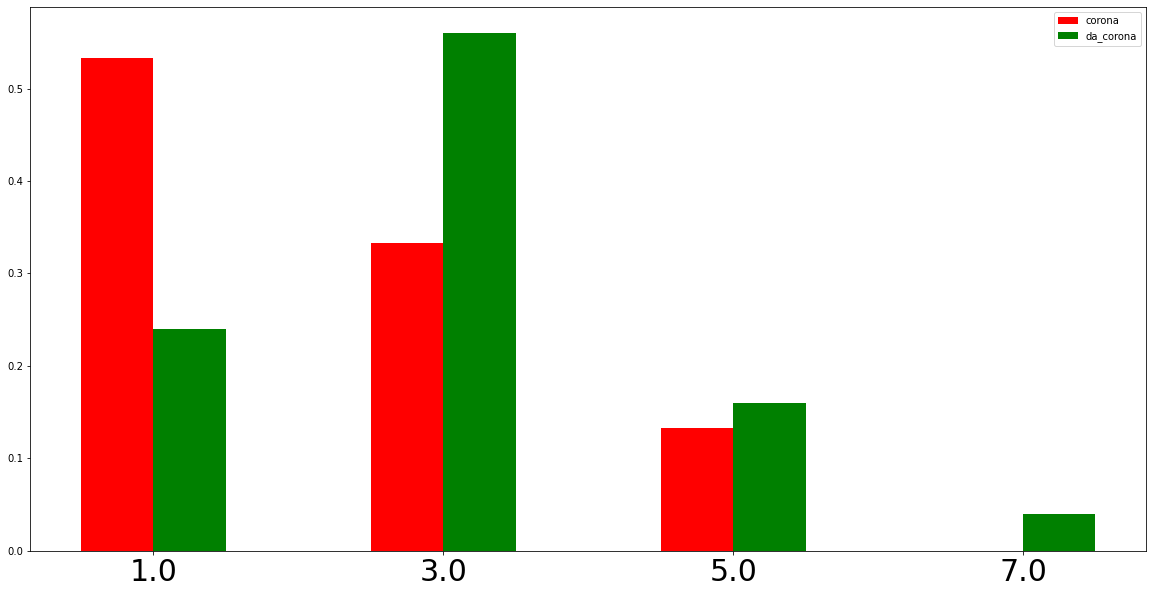

In [24]:
# Covid-19 시기, 휴식을 취할 수 있는 시간이 많이 있었나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='12'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [25]:
dic          ## check

{'시간이 많을 줄 알았는데 돌이켜보니 휴식 시간이 길진 않았던 것 같다.': 1.0,
 '휴식을 취하는 시간이 많았다.': 3.0,
 '엄청 바쁜 시간을 보내다보니 휴식 할 여유도 없던 것 같다.': 5.0,
 '잘 기억이 나지 않는다.': 7.0}

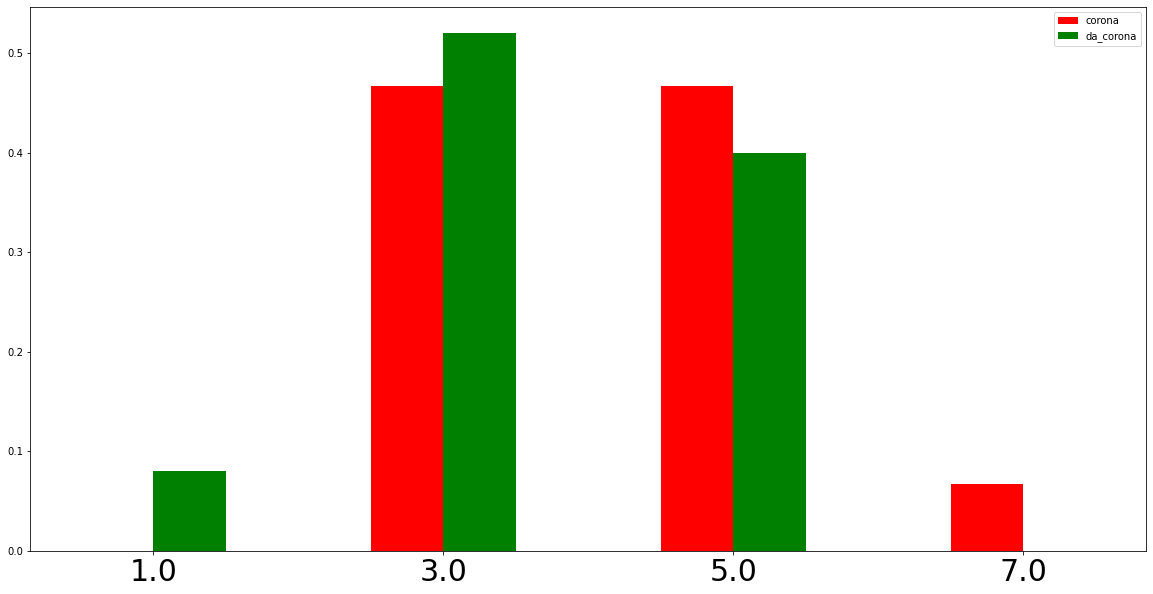

In [26]:
# Covid-19시기, 한달에 평균 몇 번의 사람들을 집이 아닌 곳에서 만난 것 같나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='13'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [27]:
dic

{'9~14회': 1.0, '0~3회': 3.0, '4~8회': 5.0, '15회 이상': 7.0}

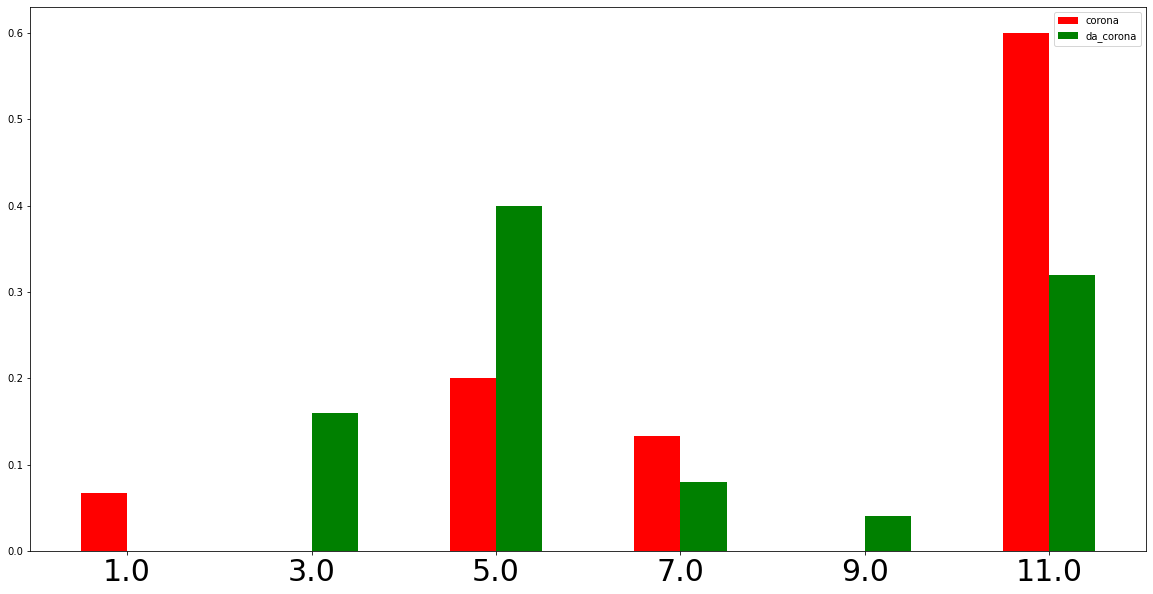

In [28]:
# 사람들을 만나서 보통 무엇을 했나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='14'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [29]:
dic          ## check

{'4단계 격상 이전에는 pc방에 자주 갔음, 술집도 자주 갔음': 1.0,
 '놀거리 (게임 활동)': 3.0,
 '카페 및 집 초대 (휴식  및 내부 식사)': 5.0,
 '자기 개발 활동 (공모전, 동아리 등 업무적 활동)': 7.0,
 '운동 (건강 관리)': 9.0,
 '식당가기 및 술먹기 (야외 식사)': 11.0}

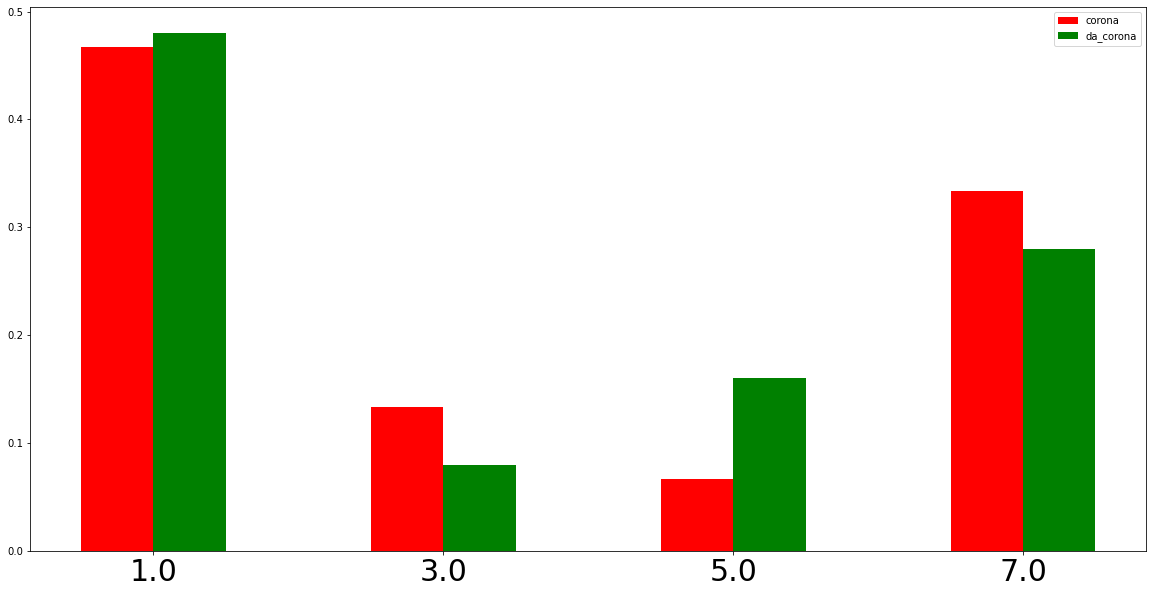

In [30]:
# 주로 어떤 사람들과 만남을 가졌나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='15'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [31]:
dic          ## check

{'대학교 이전부터 알고 지낸 학창시절 친구들': 1.0,
 '대학교 외 사람들 (etc. 대외활동)': 3.0,
 '가족 및 친인척': 5.0,
 '대학교 내 사람들': 7.0}

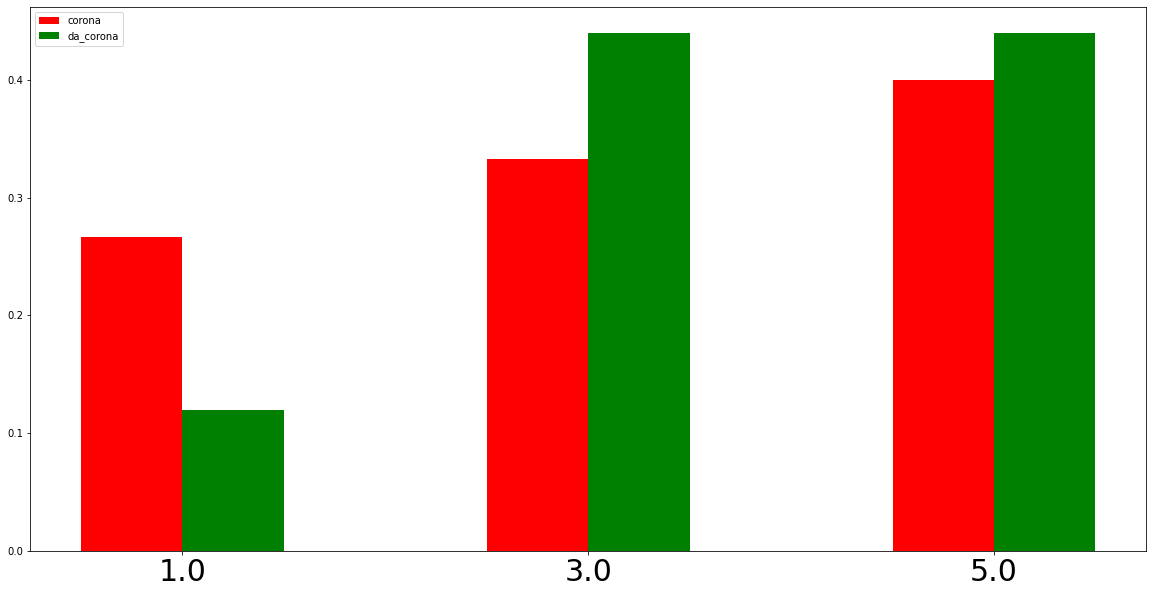

In [32]:
# 집이 아닌 외부활동을 즐겨하는 편이었나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='16'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [33]:
dic          ## check

{'네, 자주 나가는 편이에요.': 1.0,
 '자주 나가고 싶었지만 제약으로 나가지 못했어요': 3.0,
 '아니오, 이참에 휴식을 더 취하는게 좋았던거 같아요': 5.0}

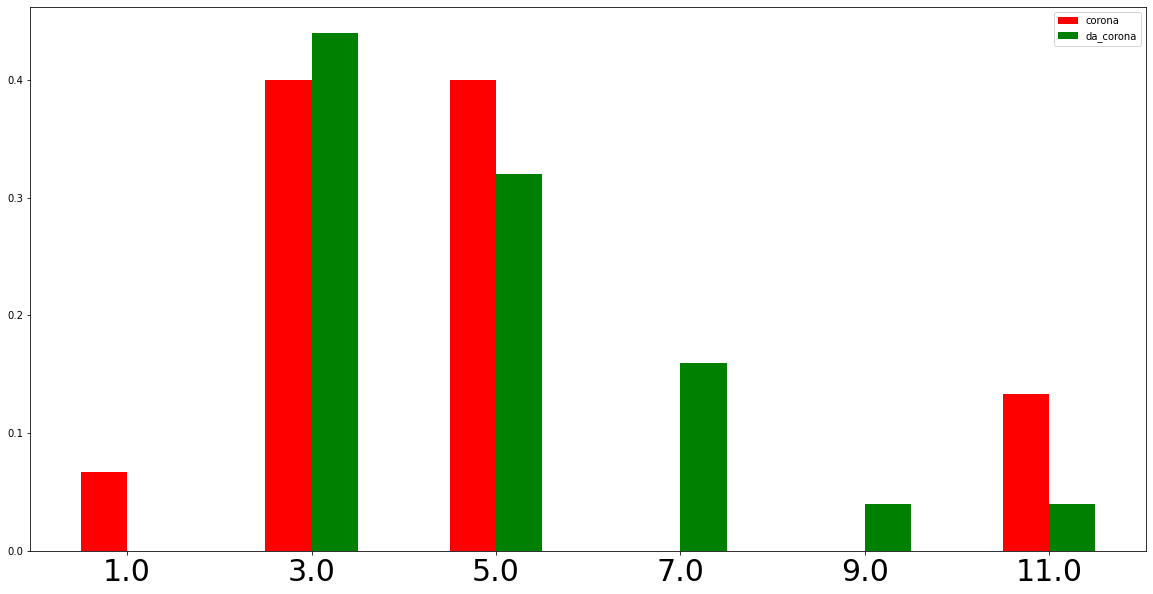

In [34]:
# 사람들을 만나고 싶은 시도를 한 적이 있나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='17'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [36]:
dic          ## check

{'가끔 시도 했다. (한달에 4번 정도)': 1.0,
 '어쩌다 한번 시도 했다. (한달에 1번 정도)': 3.0,
 '시도할 생각이 없었다.': 5.0,
 '21년도 상반기에는 거의 한달 내내 나가고, 후반기에는 아예 집콕': 7.0,
 '자주 시도 했다. (한달에 8번 정도)': 9.0,
 '시도하고 싶었지만 기회가 없어서 시도를 할 수 없었다.': 11.0}

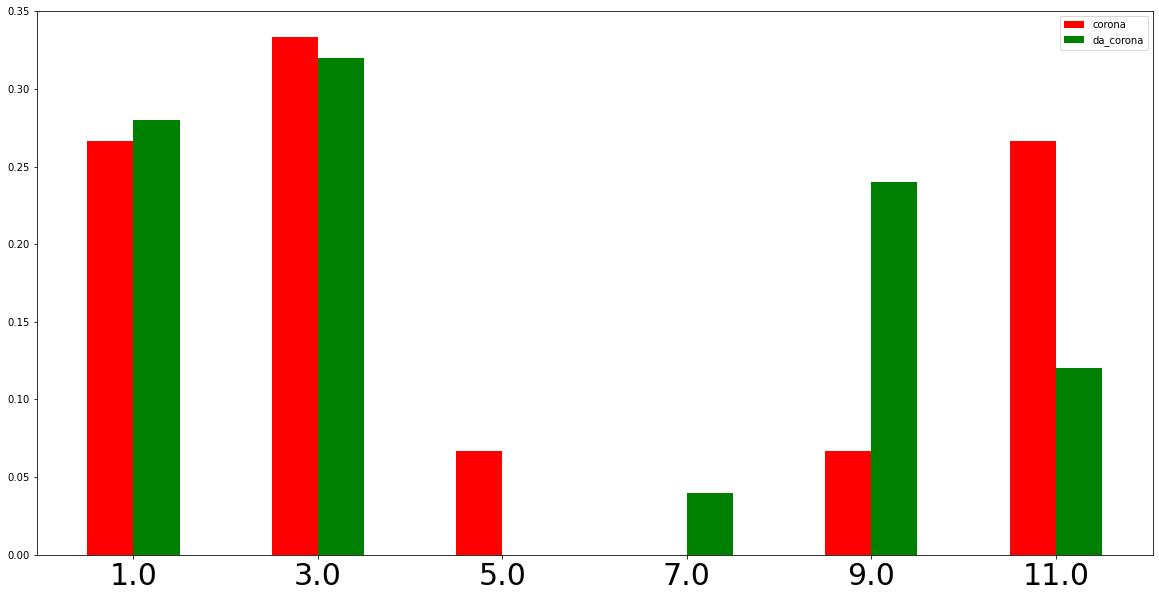

In [35]:
# 가장 기억에 남았던 대학생활을 뽑자면?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='18'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=30,rotation=0)
plt.show()

In [36]:
dic          ## check

{'교우 관계 (친구들과 놀았던 경험)': 1.0,
 '대외 활동 (공모전, 동아리 등 활동 경험)': 3.0,
 '없다': 5.0,
 '기숙사 생활': 7.0,
 '높은 성적 (높은 성취 달성 경험)': 9.0,
 '기억이 잘 나지 않는다.': 11.0}

## 현재 시점 (위드코로나)

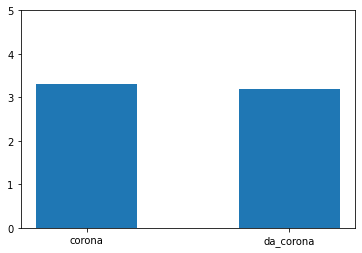

In [37]:
# 작년에 비해 지금 대학생활 만족도는 몇 점인가요?            ## check
# 행동하면서 그 순간 만큼은 즐겁거나 집중할 수 있었나요?
num='19'
lst={'corona':np.round(corona[num].mean(),1) , 'da_corona':np.round(da_corona[num].mean(),1)}
x=lst.keys()
y=lst.values()
plt.bar(x, y, width=0.5)
plt.yticks(list(range(6)))
plt.show()

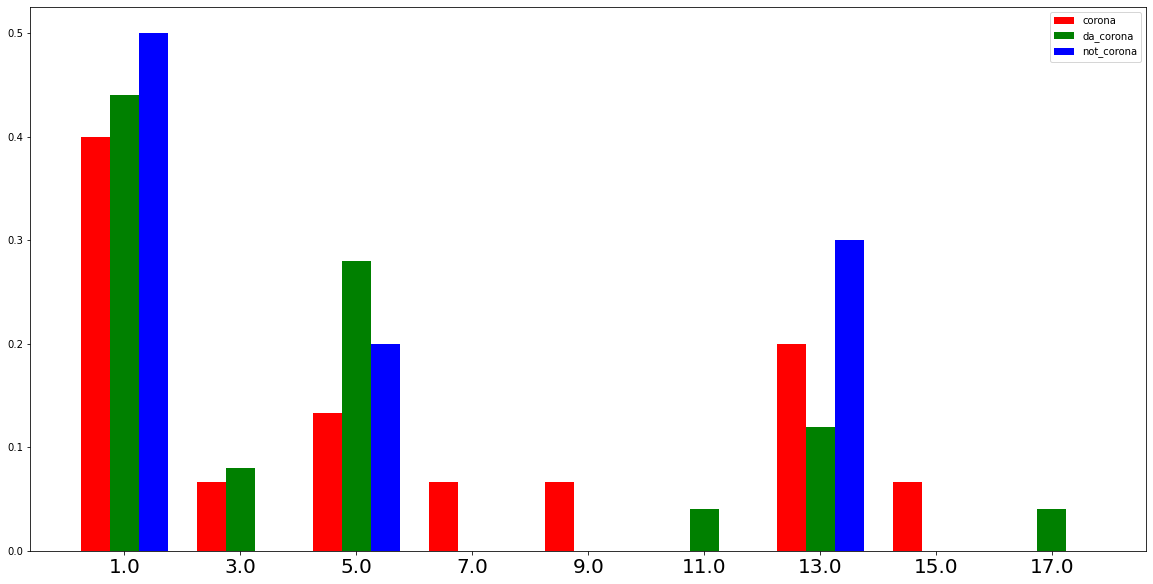

In [38]:
# 위와 같은 만족도를 평가한 이유는 무엇인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 그 외
num='20'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             list(not_corona['44'].value_counts().keys())))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona['44'].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [39]:
dic

{'달라진게 없기 때문이다.': 1.0,
 '더욱 대학생활이 안좋아졌기 때문이다.': 3.0,
 '제약이 많이 풀렸기 때문에 더욱 자유롭기 때문이다.': 5.0,
 '대학생활이 처음이라': 7.0,
 '작년에 대학생활을 하지 않았다': 9.0,
 '수업을 대면으로 듣지 못해 학업 집중도가 떨어지고 동기들과 그외 학교 사람들을 만날 수 없어서': 11.0,
 '새롭게 시작할 수 있을 것 같다.': 13.0,
 '새로운 대외활동을 하면서 많은 것을 배우고 있기 때문이다': 15.0,
 '작년엔 코로나가 막 시작되어 정신이 없었다': 17.0}

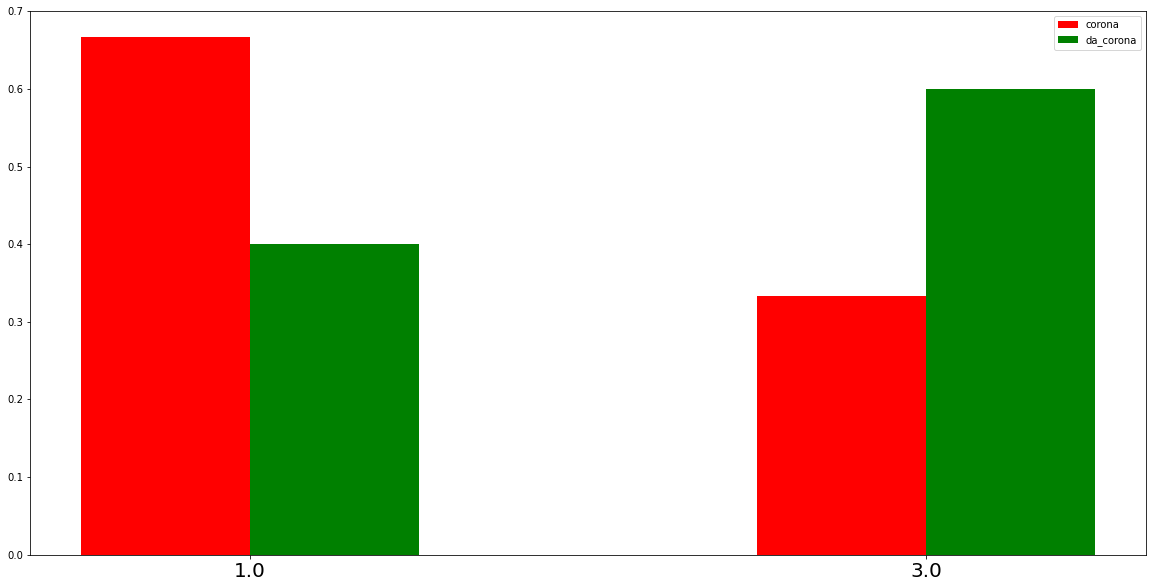

In [40]:
# 위드코로나를 떠올릴 때, 어떤 장소에 있고 싶나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='21'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [41]:
dic          ## check

{'외부': 1.0, '내부': 3.0}

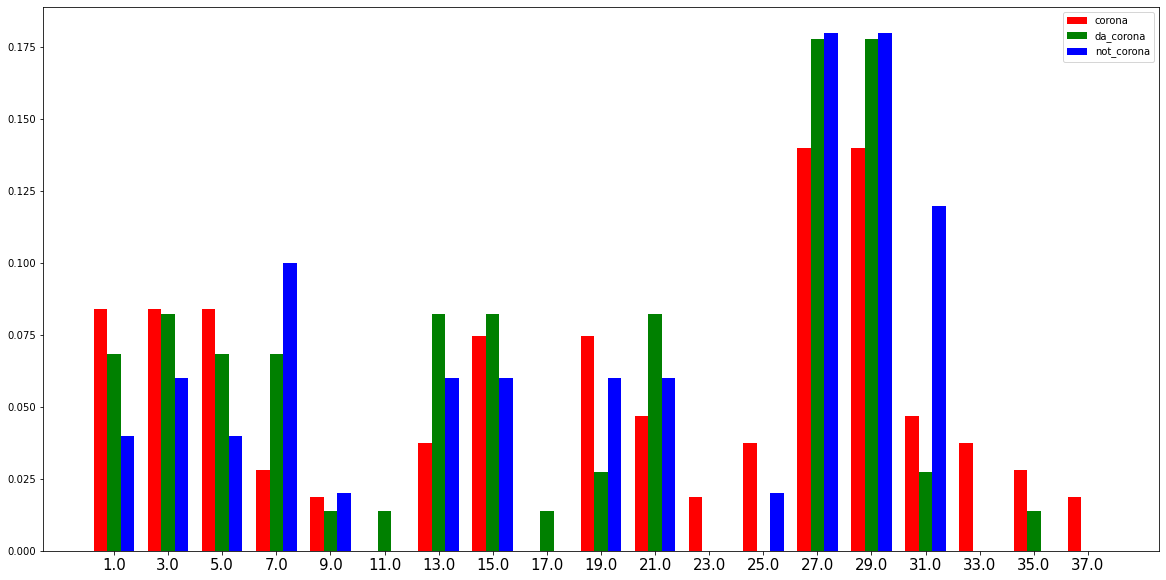

In [42]:
# 놀고 싶다는 욕구가 생길 때 최근 어떻게 여가 시간을 보냈나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 그 외
num='22'

temp=[]
for value in da_corona[num].values:
    temp2=list(value.split(','))
    temp.extend(temp2)
lst=[Counter(temp)]
lst[0][' SNS ']=lst[0]['SNS ']+lst[0][' SNS ']
del lst[0]['SNS ']

temp=[]
for value in corona[num].values:
    temp2=list(value.split(','))
    temp.extend(temp2)
lst.append(Counter(temp))
lst[1][' SNS ']=lst[1]['SNS ']+lst[1][' SNS ']
del lst[1]['SNS ']

temp=[]
for value in not_corona['41'].values:
    temp2=list(value.split(','))
    temp.extend(temp2)
lst.append(Counter(temp))
lst[2][' SNS ']=lst[2]['SNS ']+lst[2][' SNS ']
del lst[2]['SNS ']

name_num=[sum(lst[0].values()),sum(lst[1].values()),sum(lst[2].values())] # 체크한 사람 전체 개수
name=list(set(list(lst[0].keys())+(list(lst[1].keys()))+list(lst[2].keys())))
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=15,rotation=0)
plt.show()

In [43]:
dic

{' SNS ': 1.0,
 ' 사람들과 오프라인 약속을 잡음': 3.0,
 ' 온라인 커뮤니티 활동': 5.0,
 ' 독서 및 개인 정비': 7.0,
 ' 여행 가기': 9.0,
 ' 악기 연습': 11.0,
 ' 쇼핑(온라인/오프라인)': 13.0,
 ' 맛있는 음식 먹기': 15.0,
 '맛있는 음식 먹기': 17.0,
 ' 온라인 게임(콘솔게임 포함)': 19.0,
 ' 쿨쿨 잠!': 21.0,
 '운동 및 건강관리': 23.0,
 '쇼핑(온라인/오프라인)': 25.0,
 '넷플': 27.0,
 ' 유튜브 등 영상 시청': 29.0,
 ' 운동 및 건강관리': 31.0,
 ' 주식 등 투자활동': 33.0,
 '쿨쿨 잠!': 35.0,
 ' 사행성 게임 (도박성 게임)': 37.0}

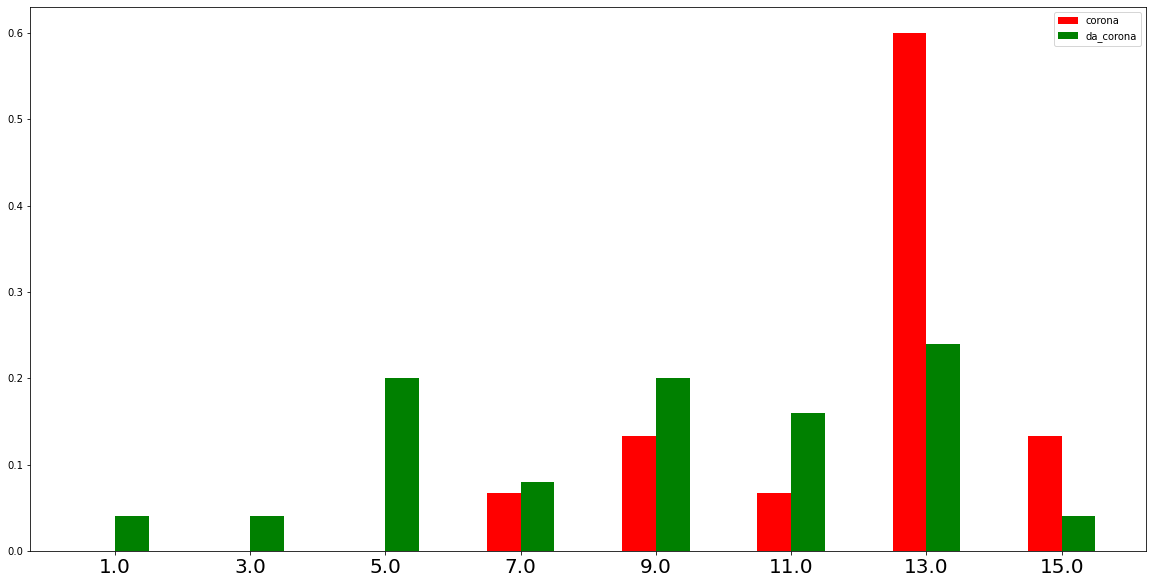

In [44]:
# 가장 열정적으로 느낄 때가 언제인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='23'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [45]:
dic          ## check

{'스스로 혹은 타인에 대한 책임감을 가졌을 때': 1.0,
 '나와 같은 목표를 같이 이뤄냈을때': 3.0,
 '어려움에 도전할 때': 5.0,
 '다른 사람과의 경쟁구도가 형성 될 때': 7.0,
 '사회적으로 인정을 받을 때': 9.0,
 '미래에 대한 계획을 세울때': 11.0,
 '무언가를 이루고 있다는 성취감이 들 때': 13.0,
 '물질적인 이익을 얻었을 때': 15.0}

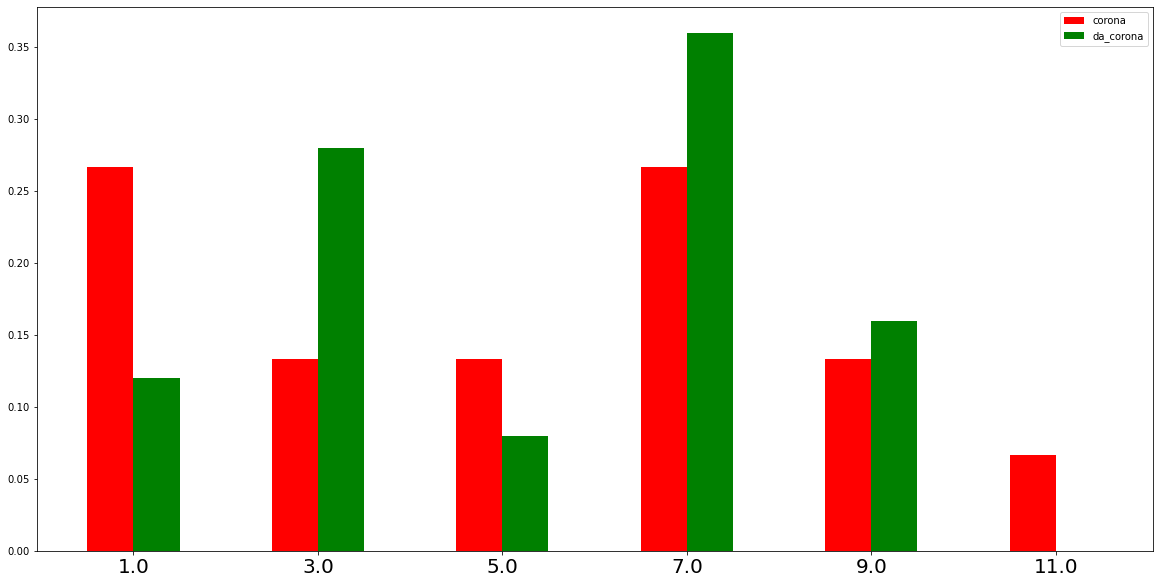

In [46]:
# 현재 대학 생활 중 가장 기억에 남는 것이 있다면?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='24'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [47]:
dic            ## check

{'잘 기억이 나지 않음': 1.0,
 '교우 관계 (친구들과 놀았던 경험)': 3.0,
 '높은 성적 ( 학업 성취도 )': 5.0,
 '대외 활동 (공모전, 동아리 등 활동 경험)': 7.0,
 '대부분의 시간을 집에서 가족과 보낸 경험': 9.0,
 '올해 상반기에 잘 지냈던 친구들이 하반기에 서먹해짐': 11.0}

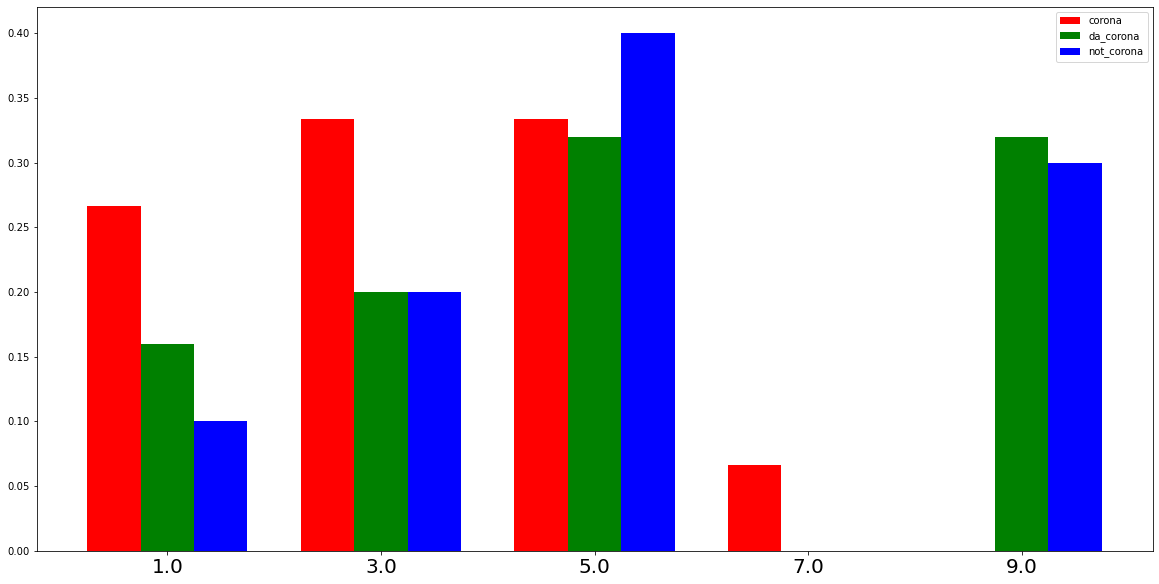

In [48]:
# 앞으로 대면활동을 시작했을 때 가장 기대되는 점은?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 //  그 외
num='25'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             list(not_corona['35'].value_counts().keys())))
name_num=[len(corona),len(da_corona),len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(),not_corona['35'].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [49]:
dic          ## check

{'기대되는 것은 딱히 없음': 1.0,
 '새로운 친구들을 사귈 기회가 생김': 3.0,
 '다양한 오프라인 활동을 할 수 있음': 5.0,
 '자기계발': 7.0,
 '오랜만에 기존 친했던 친구들을 만나서 놀 수 있음': 9.0}

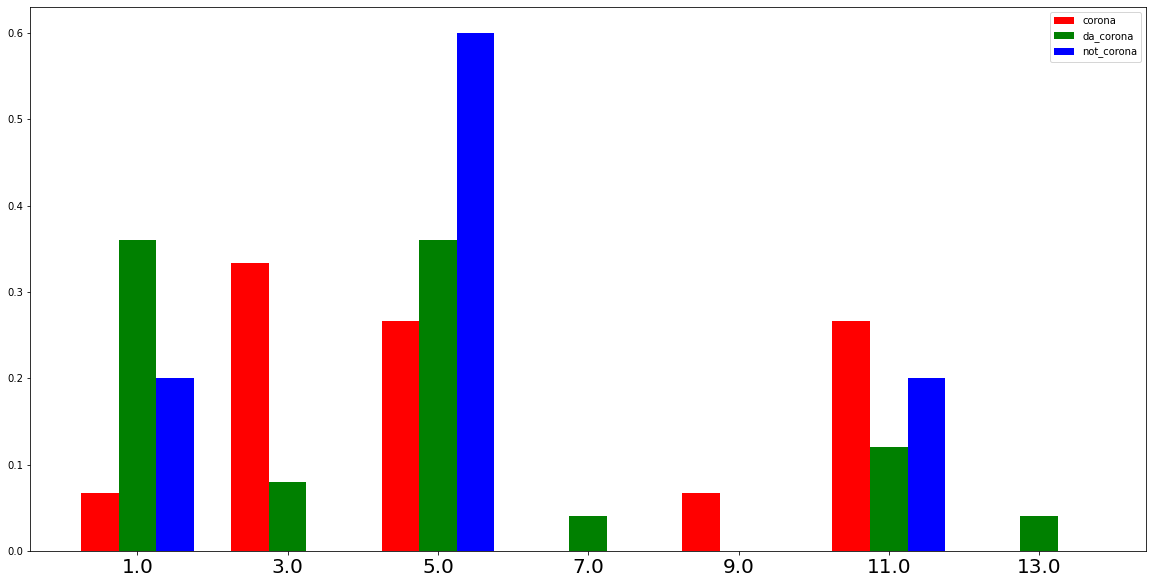

In [50]:
# 앞으로 대면활동을 시작했을 때 가장 걱정되는 점은?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 //  그 외
num='26'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             list(not_corona['36'].value_counts().keys())))
name_num=[len(corona),len(da_corona),len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(),not_corona['36'].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [51]:
dic          ## check

{'혼자였던 시간이 길어서 얘기치 못한 상황이 생길 경우': 1.0,
 '나를 제외한 이미 친구들의 무리가 형성 되었을 경우': 3.0,
 '건강 및 안전상의 문제': 5.0,
 '늘어나는 약속만큼 늘어나는 지출': 7.0,
 '통학': 9.0,
 '걱정되는 것이 딱히 없다.': 11.0,
 '통학 어떻게 하지..': 13.0}

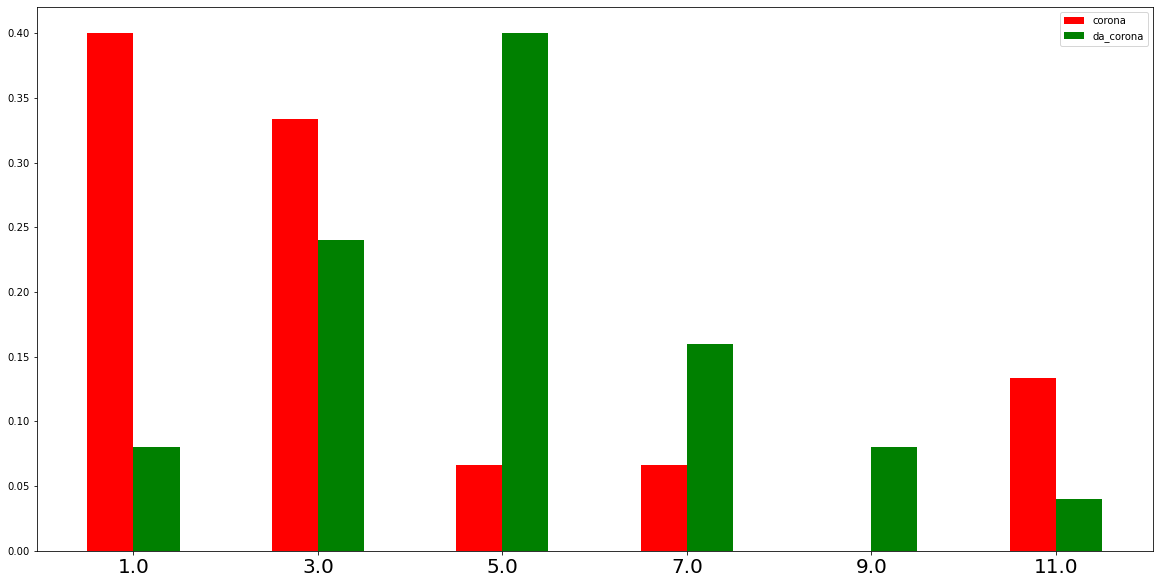

In [52]:
# 대면활동을 시작했을 때 일상에서 가장 자주 하고 싶은 활동은 무엇인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='27'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [53]:
dic          ## check

{'문화 예술 활동 (미술관, 영화관, 연극 등)': 1.0,
 'PC방, 노래방, 게임장, 만화카페, 보드게임 등': 3.0,
 '맛집 탐방 (술집 포함)': 5.0,
 '운동 및 건강관리': 7.0,
 '쇼핑(오프라인)': 9.0,
 '생각해보지 못했거나, 보기에 원하는 내용이 없음': 11.0}

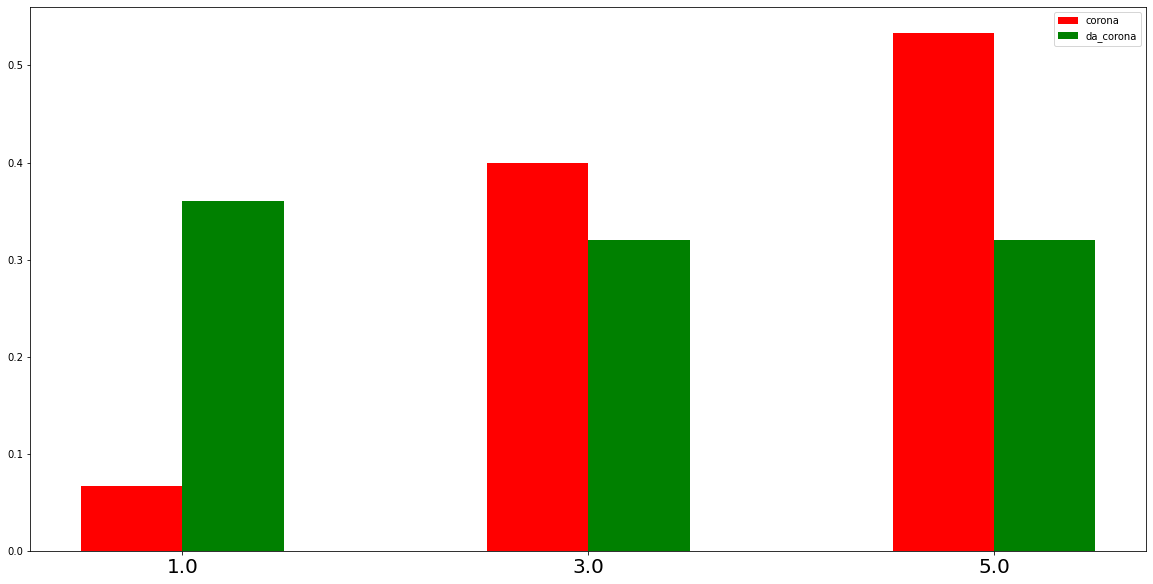

In [54]:
# 위드코로나 시기 만나고 싶은 사람은 누구인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='28'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [55]:
dic          ## check

{'ㄷ) 대외활동을 하며 만날 사람 혹은 만났던 사람들 (교외)': 1.0,
 'ㄴ) 대학교에서 오랫동안 못 봤던 친구들 (교내)': 3.0,
 'ㄱ) 기존에 친했던 사람들 간의 돈독한 관계': 5.0}

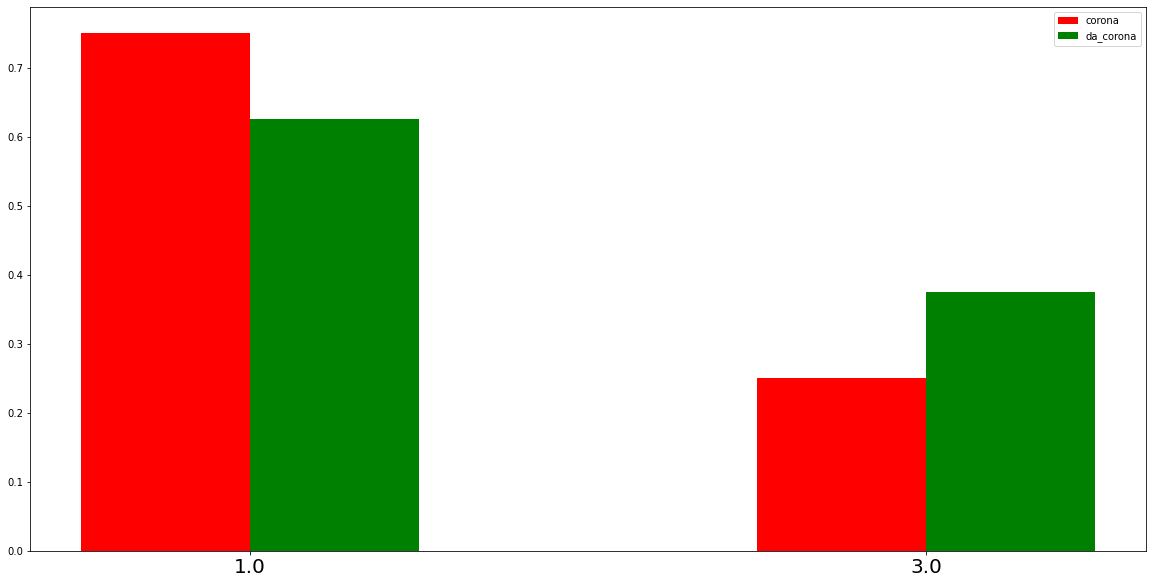

In [56]:
# (ㄱ을 고른 경우만 답해주세요.) 그 사람들은 어떤 그룹에 속하나요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람
num='29'
cnt_corona=corona[corona['28']=='ㄱ) 기존에 친했던 사람들 간의 돈독한 관계']
cnt_dacorona=da_corona[da_corona['28']=='ㄱ) 기존에 친했던 사람들 간의 돈독한 관계']
name=list(set(list(cnt_dacorona[num].value_counts().keys())+(list(cnt_corona[num].value_counts().keys()))))
name_num=[len(cnt_corona),len(cnt_dacorona)] # 설문조사 인원
lst=[cnt_corona[num].value_counts(),cnt_dacorona[num].value_counts()]
color=['r','g']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(2):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona'])
ticklabel=list(dic.values())
x=[x[i]-0.75 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [57]:
dic

{'대학교 이전 친구들': 1.0, '대학교 사람들': 3.0}

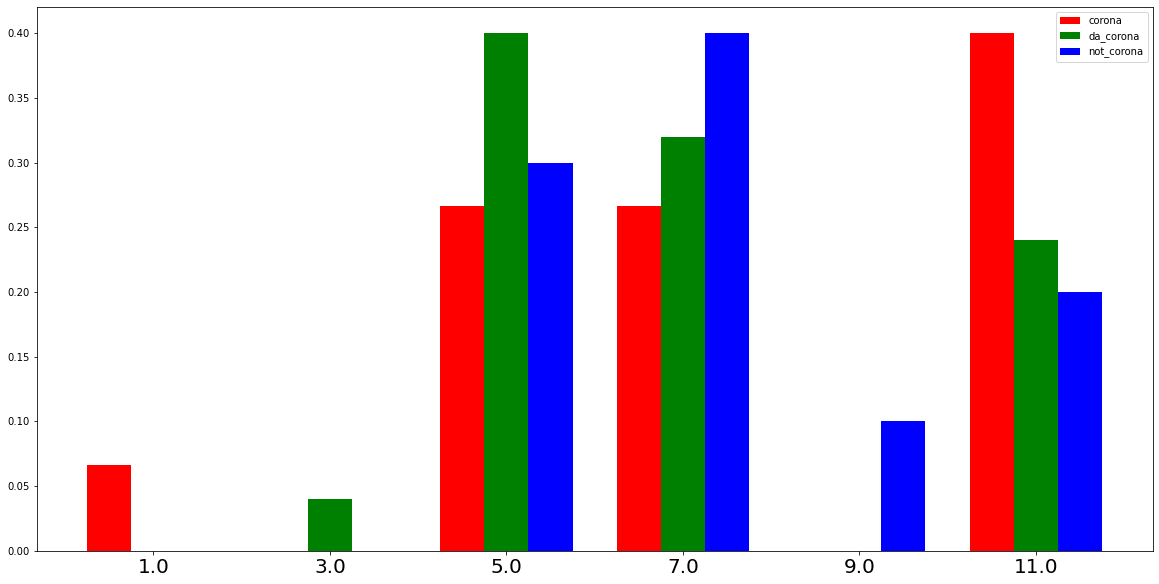

In [59]:
# 새로운 사람과 친해질 기회가 생기면 어떻게 만날 것인가요?
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 //  그 외
num='30'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             list(not_corona['40'].value_counts().keys())))
name_num=[len(corona),len(da_corona),len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(),not_corona['40'].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [60]:
dic          ## check

{'가는 곳마다 자연스레': 1.0,
 '온라인 커뮤니티 (카페/어플 등)': 3.0,
 '취미 활동': 5.0,
 '대외 활동': 7.0,
 '온라인 게임': 9.0,
 '지인 소개': 11.0}

## 마지막 단계 (서비스 측면)

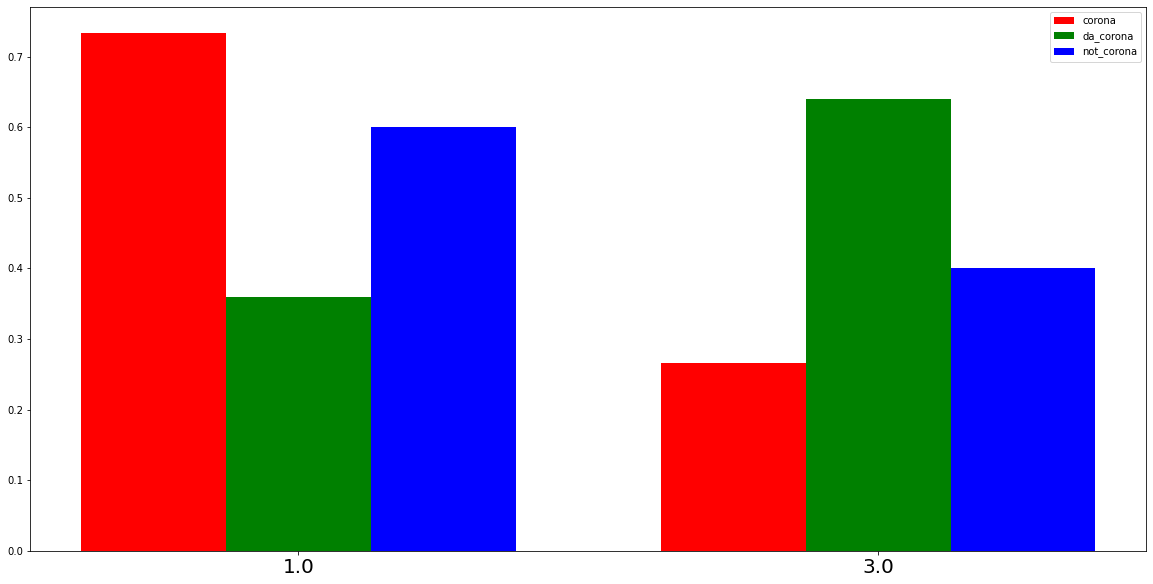

In [61]:
# 나는 보통 00 일 때 더 힘이 난다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='45'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [62]:
dic          ## check

{'함께': 1.0, '혼자': 3.0}

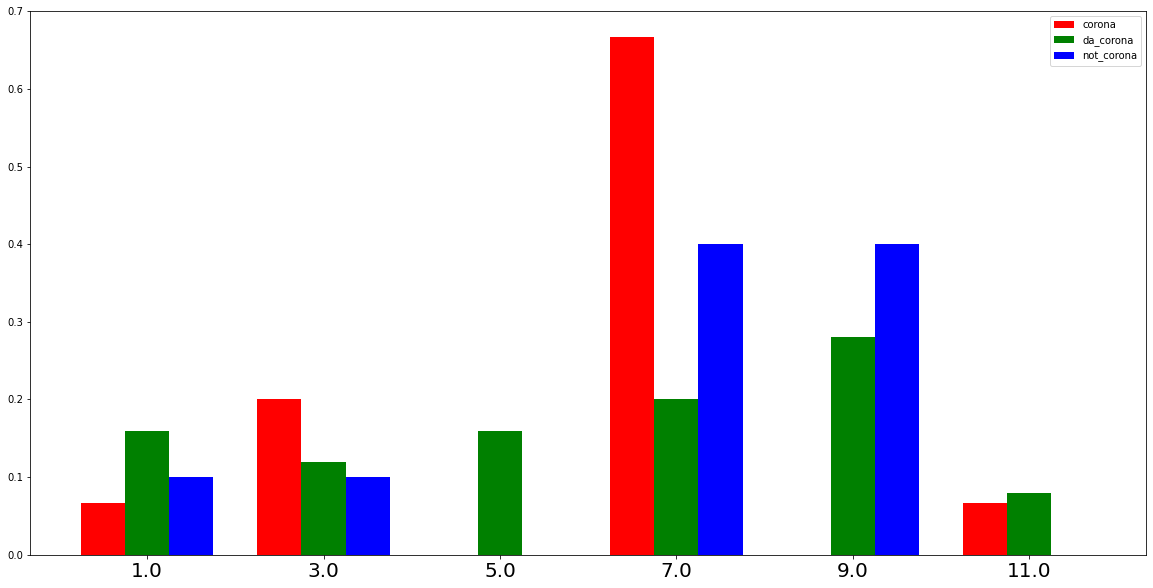

In [63]:
# 사람들과 00 할 때 기분이 짜릿하다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='46'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [64]:
dic          ## check

{'내기': 1.0,
 '알맞은 단어가 보기에 없다.': 3.0,
 '경쟁': 5.0,
 '협력': 7.0,
 '토론': 9.0,
 '봉사': 11.0}

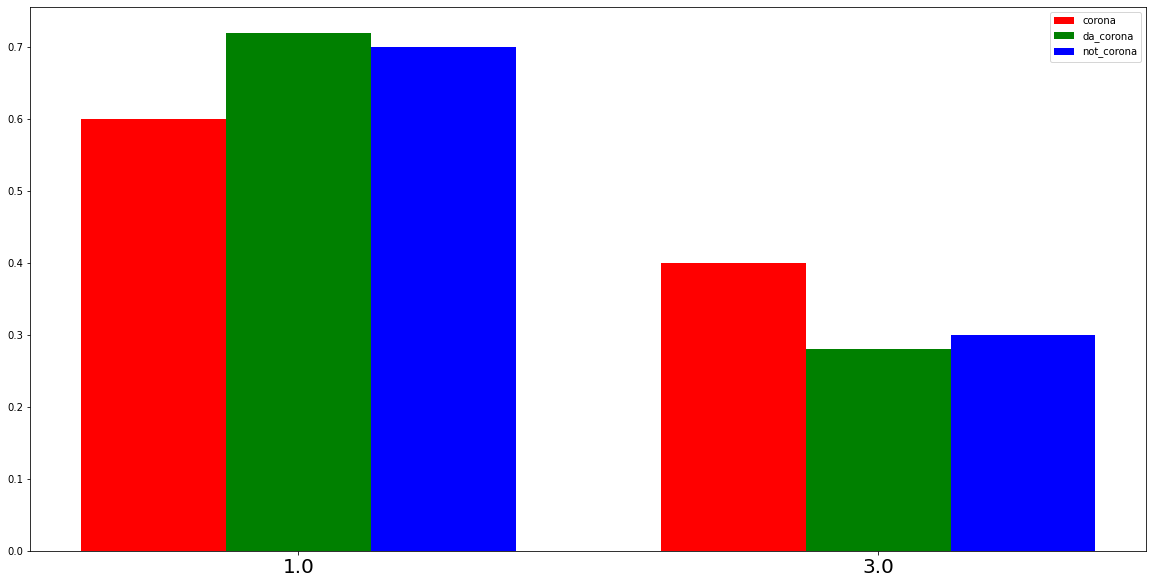

In [65]:
# 나는 주로 0에 있고 싶다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='47'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [71]:
dic          ## check (집에 있기를 좋아하는 사람들 조차도 ..?)

{'나의 역량보다 팀원의 역량을 더 중요하게 생각한다.': 1.0, '팀원의 역량보다 나의 역량를 더 중요하게 생각한다.': 3.0}

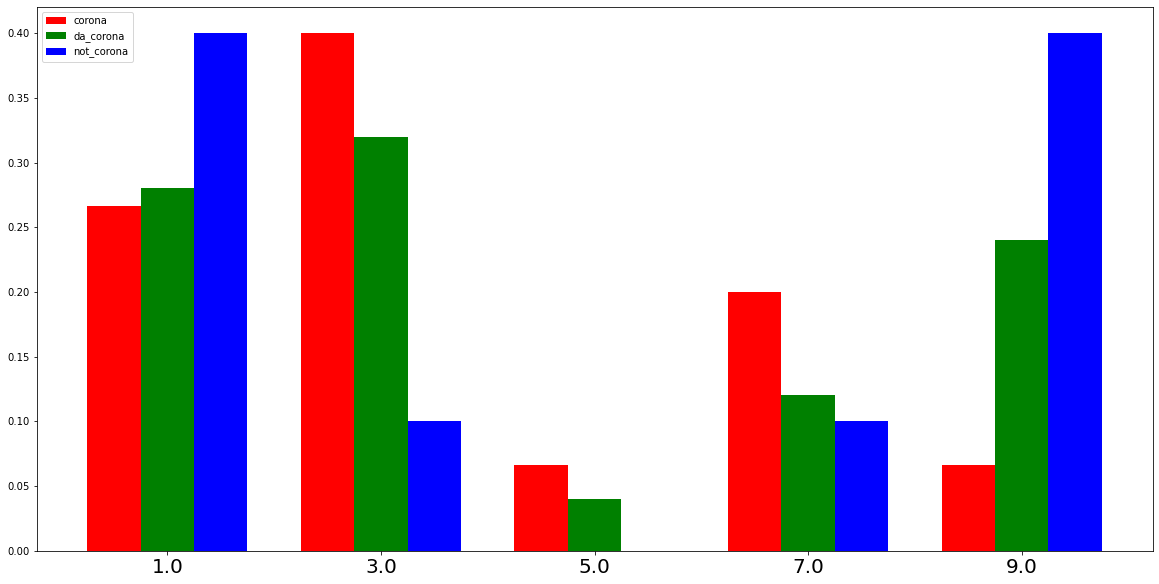

In [72]:
# 한번 휴식 할 때 00 정도는 괜찮다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='48'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [73]:
dic  

{'1시간': 1.0, '2시간 이상': 3.0, '10분': 5.0, '2시간': 7.0, '30분': 9.0}

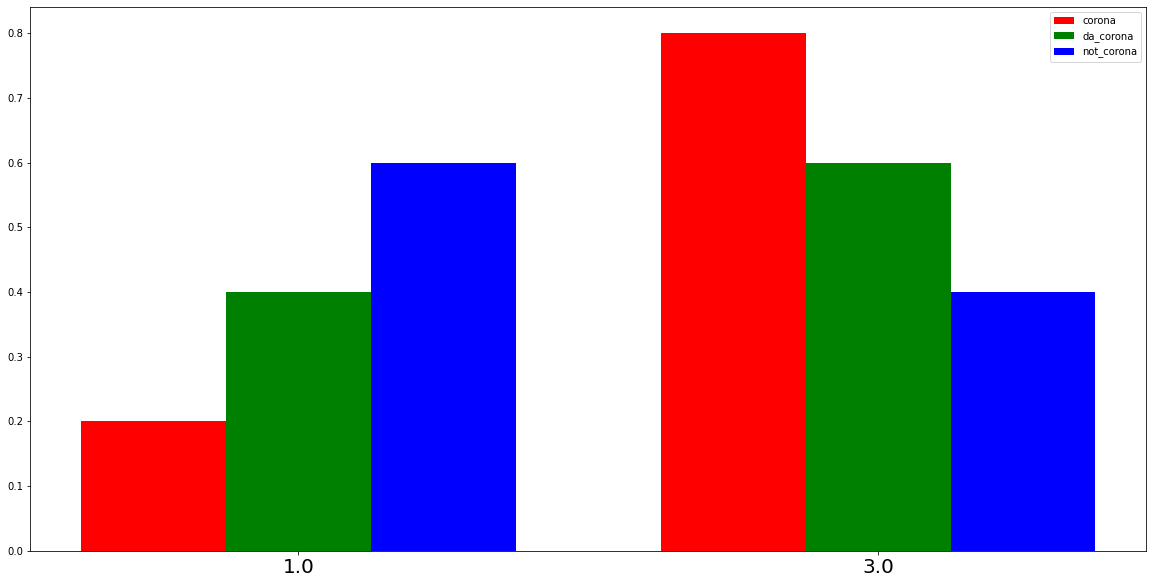

In [74]:
# 게임을 하면 00보다 더 중요하게 생각한다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='49'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [75]:
dic          ## check

{'나의 역량보다 팀원의 역량을 더 중요하게 생각한다.': 1.0, '팀원의 역량보다 나의 역량를 더 중요하게 생각한다.': 3.0}

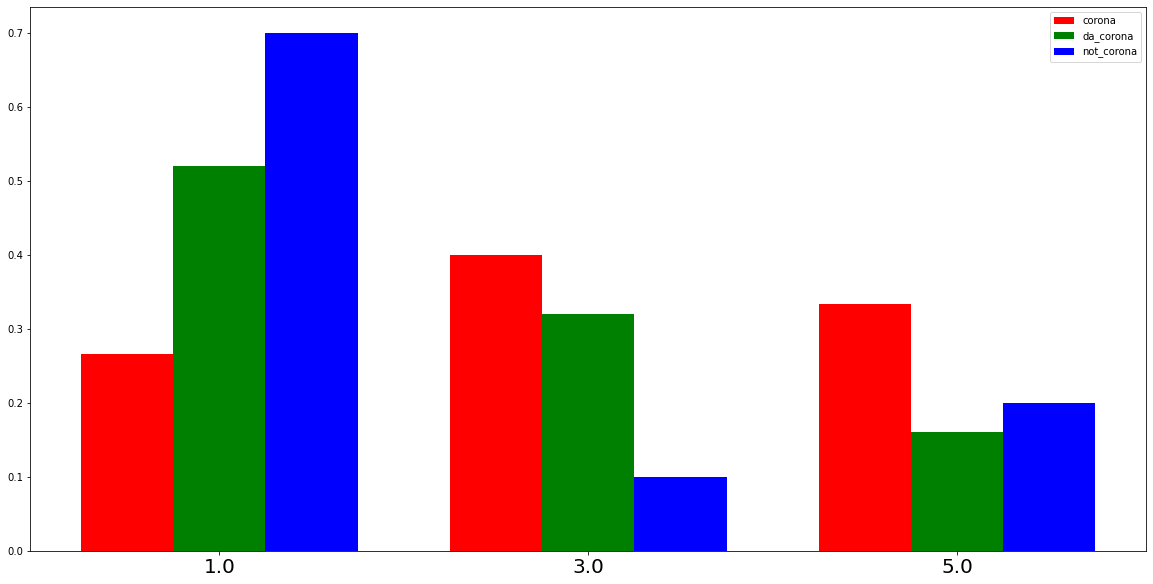

In [76]:
# 성취감은 000 를(을) 가질 경우 생긴다.
# 2020,2021년 입학 // covid-19경험 있지만 2020,2021년 속하지 않은 사람 // 졸업자 등 그 외
num='50'
name=list(set(list(da_corona[num].value_counts().keys())+(list(corona[num].value_counts().keys()))+
             (list(not_corona[num].value_counts().keys()))))
name_num=[len(corona),len(da_corona), len(not_corona)] # 설문조사 인원
lst=[corona[num].value_counts(),da_corona[num].value_counts(), not_corona[num].value_counts()]
color=['r','g','b']
dic={}
i=1.0
for st in name:
    dic[st]=i
    i+=2.0

plt.figure(figsize=(20,10))
x=list(dic.values())
for i in range(3):
    temp=[]
    for n in dic.keys():
        if n in lst[i].keys():
            temp.append(lst[i][n]/name_num[i])
        else:
            temp.append(0)
    plt.bar(x, temp,color=color[i],width=0.5)
    x=[x[i]+0.5 for i in range(len(x))]
plt.legend(['corona','da_corona','not_corona'])
ticklabel=list(dic.values())
x=[x[i]-1.0 for i in range(len(x))]
plt.xticks(x,ticklabel,fontsize=20,rotation=0)
plt.show()

In [77]:
dic          ## check

{'물질적인 보상': 1.0, '명예 (위치, 자리)': 3.0, '알맞은 단어가 보기에 없음': 5.0}

In [74]:
# 커피 보상 랜덤 추출
import random
random_num=list(data['51'].dropna().values)

In [75]:
# 적지 않은 사람 제외
len(random_num)

104

In [76]:
# 커피 당첨자   -> 잘못된 번호 확인 후 경품제공
random.sample(random_num,10)

['010-9895-2765',
 '010-2541-2457',
 '01026020923',
 '010-4289-8075',
 '010-5572-9703',
 '010-3435-1296',
 '0100000000',
 '010-8258-6010',
 '010-6600-5024',
 '010-7596-6578']